# Import Library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

pd.options.display.max_columns=999
pd.options.display.max_rows = 999

#######################PLOTTING FUNCTION#######################

# set the style of the axes and the text color
plt.rcParams['figure.figsize'] = (12.0, 5.0)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("paper")
sns.set_palette("bright")

# Plotting Function

In [3]:
#######################PLOTTING FUNCTION#######################

# set the style of the axes and the text color
plt.rcParams['figure.figsize'] = (12.0, 5.0)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("paper")
sns.set_palette("bright")

# A function to show boxplot and histogram (numeric features only)
def box_hist_plot_1(series, Title):
  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
  f.suptitle(Title) 
  sns.boxplot(series, ax=ax_box,color="r")
  sns.distplot(series.dropna(), ax=ax_hist,color="r", kde=False)
  ax_box.set(xlabel='')
  
  # Annotation for descriptive statistics of the data
  stats_describe = series.describe(percentiles=[.05, .25, .5, .75, .95])
  stats_desc = ""
  for idx in stats_describe.index.tolist():
    stats_desc += "{:5}: {}\n".format(idx, stats_describe[idx])
  ax_hist.annotate(
    stats_desc, 
    xy=(1.01, 1), 
    xycoords='axes fraction', 
    verticalalignment='top',
    horizontalalignment='left'
  )
  plt.show()
    
# A function to show boxplot and histogram (numeric features only)
def box_hist_plot_2(series, Title):
  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
  f.suptitle(Title) 
  sns.boxplot(series, ax=ax_box,color="b")
  sns.distplot(series.dropna(), ax=ax_hist,color="b", kde=False)
  ax_box.set(xlabel='')
  
  # Annotation for descriptive statistics of the data
  stats_describe = series.describe(percentiles=[.05, .25, .5, .75, .95])
  stats_desc = ""
  for idx in stats_describe.index.tolist():
    stats_desc += "{:5}: {}\n".format(idx, stats_describe[idx])
  ax_hist.annotate(
    stats_desc, 
    xy=(1.01, 1), 
    xycoords='axes fraction', 
    verticalalignment='top',
    horizontalalignment='left'
  )
  plt.show()

# A function to show boxplot and histogram in log scale
def box_hist_log_plot(series):
  try: 
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    stats_describe = series.describe(percentiles=[.05, .25, .5, .75, .95])
    # Annotation for descriptive statistics of the data
    stats_desc = ""
    for idx in stats_describe.index.tolist():
      stats_desc += "{:5}: {}\n".format(idx, stats_describe[idx])
    ax_hist.annotate(
      stats_desc, 
      xy=(1.01, 1), 
      xycoords='axes fraction', 
      verticalalignment='top',
      horizontalalignment='left'
    )
    
    s_new = np.log10(series)
    s_new[s_new == -np.inf] = np.nan
    IQR = s_new.quantile(0.75) - s_new.quantile(0.25) + 0.1
    s_range = s_new.max() - s_new.quantile(0.05)
    cube = np.cbrt(len(s_new))
    newBins = np.logspace(s_new.min(), s_new.max(), round(s_range/(2*IQR/cube)))
    
    sns.boxplot(series, ax=ax_box)
    sns.distplot(series.dropna(), bins=newBins, ax=ax_hist, kde=False)
    ax_box.set(xlabel='')
    ax_box.set(xscale="log")
    plt.show()
  except ValueError:
    pass

# A function to show boxplot and histogram for each feature by its label
def divided_box_hist_plot(series, y):
  labels = y.unique()
  gs_kw = dict(width_ratios=[.5, .5], height_ratios=[.15, .85])
  f, ax = plt.subplots(2, 2, sharex=True, gridspec_kw=gs_kw)
  sns.boxplot(series[y==labels[0]], color="red", ax=ax[0][0])
  sns.boxplot(series[y==labels[1]], color="blue", ax=ax[0][1])
  ax[0][0].set(xlabel="")
  ax[0][1].set(xlabel="")
  sns.distplot(series[y==labels[0]].dropna(), color="red", ax=ax[1][0], kde=False)
  sns.distplot(series[y==labels[1]].dropna(), color="blue", ax=ax[1][1], kde=False)
  ax[1][0].set(xlabel=f"{series.name} ({labels[0]})")
  ax[1][1].set(xlabel=f"{series.name} ({labels[1]})")
  plt.show()

# A function to show boxplot and histogram for each feature by its label in log scale
def divided_box_hist_log_plot(series, y):
  try:
    newBins = dict()
    labels = y.unique()
    for target in labels:
      s_new = np.log10(series[y==target])
      s_new[s_new == -np.inf] = np.nan
      IQR = s_new.quantile(0.75) - s_new.quantile(0.25) + 0.01
      s_range = s_new.max() - s_new.quantile(0.05)
      cube = np.cbrt(len(s_new))
      newBins[target] = np.logspace(s_new.min(), s_new.max(), round(s_range/(2*IQR/cube)))
    
    gs_kw = dict(width_ratios=[.5, .5], height_ratios=[.15, .85])
    f, ax = plt.subplots(2, 2, sharex=True, gridspec_kw=gs_kw)
    sns.boxplot(series[y==labels[0]], color="red", ax=ax[0][0])
    sns.boxplot(series[y==labels[1]], color="blue", ax=ax[0][1])
    ax[0][0].set(xlabel="")
    ax[0][1].set(xlabel="")
    sns.distplot(series[y==labels[0]].dropna(), bins=newBins[f"{labels[0]}"], color="red", ax=ax[1][0], kde=False)
    sns.distplot(series[y==labels[1]].dropna(), bins=newBins[f"{labels[1]}"], color="blue", ax=ax[1][1], kde=False)
    ax[1][0].set(xlabel=f"{series.name} ({labels[0]})", xscale="log")
    ax[1][1].set(xlabel=f"{series.name} ({labels[1]})", xscale="log")
    plt.show()
  except ValueError:
    pass
  
# A function to show barplot (categorical features only)
def bar_plot(series):
  ax = series.value_counts(dropna=False) \
             .plot(kind="bar")
    
  # Annotation for percentage of each bar
  for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    pct = height / len(series) * 100
    x, y = p.get_xy() 
    ax.annotate('{:.2f}%'.format(pct), (x + width/2, y + height*1.02), ha='center')
  ax.set_xlabel(series.name)
  
  # Annotation for descriptive statistics of the data
  stats_describe = series.describe()
  stats_desc = ""
  for idx in stats_describe.index.tolist():
    stats_desc += "{:5}: {}\n".format(idx, stats_describe[idx])
  ax.annotate(
    stats_desc, 
    xy=(1.01, 1), 
    xycoords='axes fraction', 
    verticalalignment='top',
    horizontalalignment='left'
  )
  plt.show()

def divided_bar_plot(series, y):
  labels = y.unique()
  f, ax = plt.subplots(1, 2, gridspec_kw=dict(width_ratios=[.5, .5]))
  series[y==labels[0]].value_counts(dropna=False).plot.bar(color="red", ax=ax[0])
  series[y==labels[1]].value_counts(dropna=False).plot.bar(color="blue", ax=ax[1])
  
  # Annotation for percentage of each bar
  for ax_i in ax:
    tot_height = 0
    for p in ax_i.patches:
      tot_height += p.get_height()
    
    for p in ax_i.patches:
      width = p.get_width()
      height = p.get_height()
      pct = height / tot_height * 100
      x, y = p.get_xy() 
      ax_i.annotate('{:.2f}%'.format(pct), (x + width/2, y + height*1.02), ha='center')
  ax[0].set_xlabel(f"{series.name} ({labels[0]})")
  ax[1].set_xlabel(f"{series.name} ({labels[1]})")
  plt.show()


# A function to show correlation between numeric features
def numeric_corr(df, method="spearman"):
  plt.figure(figsize=(14, 14))
  sns.heatmap(df.corr(method=method), 
              cbar=True, 
              center=0, 
              annot=True, 
              annot_kws={"fontsize":3})
  plt.show()

#### PART 2 ####

## Plot data dalam bentuk histogram (gunakan untuk mengetahui distribusi data)
### data_frame: data to be plotted in pandas dataframe format
### feature_name: feature in dataframe to be used
### n_bins: jumlah bins untuk plot histogram
### plot_label: label name of plot axis [x, y]
### plot_title: Title untuk plot
def plot_hists(data_frame, feature_name, n_bins, plot_label, plot_title, path_file=None, grid=True, density=False, save_figure=False):
    sea_plot = sns.distplot(data_frame[feature_name], kde=density, bins=n_bins)

    p5, q1, q2, q3, p95 = np.percentile(data_frame[feature_name], [5, 25, 50, 75, 95])
    mean_feature = np.around(np.mean(data_frame[feature_name]), 2)
    min_feature = np.around(np.min(data_frame[feature_name]), 2)
    std_feature = np.around(np.std(data_frame[feature_name]), 2)
    var_feature = np.around(np.var(data_frame[feature_name]), 2)
    max_feature = np.around(np.max(data_frame[feature_name]), 2)

    plt.ticklabel_format(axis='x', style='plain')
    plt.xlabel(plot_label[0], fontsize=8, fontweight='black', color = '#333F4B')
    plt.ylabel(plot_label[1], fontsize=8, fontweight='black', color = '#333F4B')
    plt.axvline(x=mean_feature, color='c', linestyle='--', label='Mean')
    plt.axvline(x=np.around(q2, 2), color='m', linestyle='--', label='Median')
    plt.axvline(x=np.around(p5, 2), color='b', linestyle='--', label='Percentile-5%')
    plt.axvline(x=np.around(p95, 2), color='r', linestyle='--', label='Percentile-95%')
    plt.axvline(x=np.around(q1, 2), color='g', linestyle='--', label='Q1')
    plt.axvline(x=np.around(q3, 2), color='y', linestyle='--', label='Q3')
    
    plt.title(plot_title, loc='left', fontdict={'family': 'corbel', 'color': 'black', 'size': 12})
    
    stat_desc = "Count: " + str(len(data_frame[feature_name])) + "\nMean: " + str(mean_feature) + "\nStdDev: " + str(std_feature) \
        + "\nVariansi: " + str(var_feature) + "\nMin: " + str(min_feature) \
            + "\nPercentile-5%: " + str(np.around(p5, 2)) + "\nQ1: " + str(np.around(q1, 2)) \
                + "\nMedian: " + str(np.around(q2, 2)) + "\nQ3: " + str(np.around(q3, 2)) \
                    + "\nPercentile-95%: " + str(np.around(p95, 2)) + "\nIQR: " + str(np.around(q3-q1, 2)) + "\nMax: " + str(max_feature) 
    
    plt.gcf().text(0.907, 0.86, stat_desc, fontdict={'size': 12, 'verticalalignment': 'top', 'horizontalalignment': 'left'})
    
    ### Put the legend out of the figure
    sea_plot.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=3)
    
    plt.grid(grid)
    if save_figure and path_file is not None:
        plt.savefig('%s.png' % path_file, dpi=300, bbox_inches='tight')
        plt.close()

def plot_hbar(data_frame, axis_features, plot_label, plot_title, path_file=None, grid=True, save_figure=False):
    ### Plot Bar Chart from data
    ax = sns.barplot(x=axis_features[0], y=axis_features[1], data=data_frame)

    #ax.set_xticklabels(['{:,}'.format(int(x)) for x in ax.get_xticks()])
    plt.setp(ax.get_xticklabels(), ha='center', va='top')
    #print([x for x in ax.get_xticklabels(False)])
    #plt.setp(ax.get_xticklabels(), rotation=90, ha='left', va='top')
    max_yaxis = np.max(data_frame[axis_features[1]])
    plt.ylim(0, max_yaxis+(0.15*max_yaxis))
    
    for indeks, value in enumerate(data_frame[axis_features[1]]):
        #ax.text(indeks, value, str(value), fontdict={'family': 'corbel', 'color': 'black', 'size': 9}, ha='center', va='bottom')
        ax.text(indeks, value, str(value), fontdict={'family': 'corbel', 'color': 'black', 'size': 9}, ha='center', va='bottom')

    plt.xlabel(plot_label[0], fontsize=8, fontweight='black', color = '#333F4B')
    plt.ylabel(plot_label[1], fontsize=8, fontweight='black', color = '#333F4B')
    
    locs, labels=plt.xticks()
    x_ticks = []
    plt.xticks(locs,time_interval, rotation=45, horizontalalignment='right')
    
    plt.title(plot_title, loc='left', fontdict={'family': 'corbel', 'color': 'black', 'size': 12})

    plt.grid(grid)
    if save_figure and path_file is not None:
        plt.savefig('%s.png' % path_file, dpi=300, bbox_inches='tight')
        plt.close()

## Plot data dalam bentuk categories plot (gunakan untuk mengetahui distribusi subclass masing - masing class)
### data_frame: data to be plotted in pandas dataframe format
### axis_features: feature in dataframe to be used as axis [x, y]
### plot_label: label name of plot axis [x, y]
### plot_title: Title untuk plot
def plot_categories(data_frame, axis_features, plot_label, plot_title, path_file=None, grid=True, save_figure=False):
    sns.factorplot(x=axis_features[0], y=axis_features[1], hue=axis_features[2], data=data_frame, kind='bar', aspect=2, legend=False)

    ax = plt.gca()
    max_yaxis = np.max(data_frame[axis_features[1]])
    plt.ylim(0, max_yaxis+(0.15*max_yaxis))
    ax.set_xticklabels(labels=data_frame[axis_features[0]].unique(), rotation=90)

    for p in ax.patches:
      if ~np.isnan(p.get_height()):
        ax.text(p.get_x() + p.get_width()/2, p.get_height(), str(int(p.get_height())), fontdict={'family': 'corbel', 'color': 'black', 'size': 9}, ha='center', va='bottom', rotation=90)

    plt.xlabel(plot_label[0], fontsize=8, fontweight='black', color = '#333F4B')
    plt.ylabel(plot_label[1], fontsize=8, fontweight='black', color = '#333F4B')
    plt.title(plot_title, loc='left', fontdict={'family': 'corbel', 'color': 'black', 'size': 12}, ha='left')

    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
    plt.grid(grid)
    #if save_figure and path_file is not None:
    #    plt.savefig('%s.png' % path_file, dpi=300, bbox_inches='tight')
    
    
    
def plot_boxplot(data_frame,y,plot_title,x=None,grup=None):
    '''
      Menghasilkan boxplot untuk 1 atau 2 variabel beserta target variabel

      Args :
       - data_frame (pd.DataFrame) : Dataset
       - y (numeric)               : Variabel pertama
       - plot_title (string)       : Judul plot
       - x (categorical/object)    : Variabel kedua
       - grup (categorical/object) : Variabel target

      Return :
       - figure: boxplot
    '''
    fig = plt.figure(figsize =(15, 8))
    ax = sns.boxplot(data = data_frame, x=x, y = y,hue = grup,
                     width=0.8,linewidth=2,showmeans=True,
                     meanprops={"marker":"o",
                                "markerfacecolor":"white", 
                                "markeredgecolor":"black",
                                "markersize":"10"})
    max_y = np.max(data_frame[y])
    plt.ylim(0,max_y+(0.3*max_y))
    plt.title(plot_title, loc='center', fontdict={'family': 'corbel', 'color': 'black', 'size': 20})
    if x is not None:
        plt.xlabel('{}'.format(x.lower()), fontsize=15, fontweight='black', color = '#333F4B')
        
    plt.ylabel('{}'.format(y.lower()), fontsize=15, fontweight='black', color = '#333F4B')



In [4]:
df = pd.read_csv('20210225_dataset_per_nasabah_demografi_backtest_labeled.csv')

In [6]:
cols = list(df.columns.values)

In [11]:
df = df[['cif_id',
 'plafond_agg',
 'purchase_amt_agg',
 'loan_term_min_agg',
 'loan_term_mean_agg',
 'loan_term_max_agg',
 'total_spent_l3d_agg',
 'cumsum_bill_adj_agg',
 'avg_credit_agg',
 'pct_of_credit_agg',
 'rule_1_all_agg',
 'rule_2_all_agg',
 'rule_3_all_agg',
 'comb_rule_all_agg',
 'pct_of_plf_pch_agg',
 'pct_of_plf_l3d_agg',
 'comb_rule_and_agg',
 'cumul_comb_rule_all_agg',
 'cumul_comb_rule_and_agg',
 'cumul_avg_rule_all_agg',
 'cumul_avg_rule_and_agg',
 'acct_opn_date',
 'first_trx',
 'freq_credit_last1m',
 'rata_credit_last1m',
 'freq_debit_last1m',
 'rata_debit_last1m',
 'freq_credit_last3m',
 'rata_credit_last3m',
 'freq_debit_last3m',
 'rata_debit_last3m',
 'freq_credit_last6m',
 'rata_credit_last6m',
 'freq_debit_last6m',
 'rata_debit_last6m',
 'age',
 'detail_gender',
 'detail_marital_status',
 'collectibility',
 'detail_last_education',
 'detail_occupation_type',
 'flag_payroll',
 'income_now',
 'income_apply',
 'grade',
 'posisi',
 'avg_monthly_credit_last1m',
 'avg_monthly_credit_last3m',
 'avg_monthly_credit_last6m',
 'avg_monthly_debit_last1m',
 'avg_monthly_debit_last3m',
 'avg_monthly_debit_last6m',
 'avg_monthly_credit - debit_last1m',
 'avg_monthly_credit - debit_last3m',
 'avg_monthly_credit - debit_last6m',
 'ratio_credit/debit_last1m',
 'ratio_credit/debit_last3m',
 'ratio_credit/debit_last6m',
 'ratio_freq_credit/debit_last1m',
 'ratio_freq_credit/debit_last3m',
 'ratio_freq_credit/debit_last6m',
 'umur_rekening (hari)',
 'umur_rekening (dalam tahun)',
 'min_credit_last_6m',
 'max_credit_last_6m',
 'min_debit_last_6m',
 'max_debit_last_6m',
 'min_credit/max_credit (last 6 month)','label']]

In [14]:
df.head()

,cif_id,plafond_agg,purchase_amt_agg,loan_term_min_agg,loan_term_mean_agg,loan_term_max_agg,total_spent_l3d_agg,cumsum_bill_adj_agg,avg_credit_agg,pct_of_credit_agg,rule_1_all_agg,rule_2_all_agg,rule_3_all_agg,comb_rule_all_agg,pct_of_plf_pch_agg,pct_of_plf_l3d_agg,comb_rule_and_agg,cumul_comb_rule_all_agg,cumul_comb_rule_and_agg,cumul_avg_rule_all_agg,cumul_avg_rule_and_agg,acct_opn_date,first_trx,freq_credit_last1m,rata_credit_last1m,freq_debit_last1m,rata_debit_last1m,freq_credit_last3m,rata_credit_last3m,freq_debit_last3m,rata_debit_last3m,freq_credit_last6m,rata_credit_last6m,freq_debit_last6m,rata_debit_last6m,age,detail_gender,detail_marital_status,collectibility,detail_last_education,detail_occupation_type,flag_payroll,income_now,income_apply,grade,posisi,avg_monthly_credit_last1m,avg_monthly_credit_last3m,avg_monthly_credit_last6m,avg_monthly_debit_last1m,avg_monthly_debit_last3m,avg_monthly_debit_last6m,avg_monthly_credit - debit_last1m,avg_monthly_credit - debit_last3m,avg_monthly_credit - debit_last6m,ratio_credit/debit_last1m,ratio_credit/debit_last3m,ratio_credit/debit_last6m,ratio_freq_credit/debit_last1m,ratio_freq_credit/debit_last3m,ratio_freq_credit/debit_last6m,umur_rekening (hari),umur_rekening (dalam tahun),min_credit_last_6m,max_credit_last_6m,min_debit_last_6m,max_debit_last_6m,min_credit/max_credit (last 6 month),label
0,C000000004,5000000.0,3698553,3,4.500000,6,3698553,7.732015e+05,1.945309e+08,0.008286,1,0,0,1,0.739711,0.739711,1,1,1,0.500000,0.500000,5/8/2019,5/21/2019 22:19,9,6621546.993,119,1.341754e+06,31,8658323.878,282,9.252740e+05,73,7.420370e+06,564,9.581919e+05,39.0,Laki-laki,Menikah,1,Strata 1 (S1),Karyawan,PAYROLL,26821117.5,20000000.0,1.0,20210207,59593922.94,89469346.74,9.028117e+07,159668775.0,86975751.93,9.007004e+07,-100074852.1,2.493595e+06,2.111313e+05,4.934992,9.357579,7.744138,0.075630,0.109929,0.129433,4556,12.482192,59593922.94,140135500.3,36606717.0,159668775.0,0.425259,0
1,C000000001,5000000.0,8404849,1,2.312500,6,9953251,1.140943e+07,1.575923e+09,0.237128,0,0,0,0,1.680970,1.990650,0,0,0,0.000000,0.000000,5/8/2019,5/21/2019 22:22,6,2334304.167,69,8.319019e+05,17,4663068.571,146,5.220592e+05,33,3.684057e+06,266,4.420984e+05,28.0,Laki-laki,Lajang,1,Strata 1 (S1),Karyawan,PAYROLL,11897296.0,10000000.0,1.0,20210207,14005825.00,26424055.23,2.026232e+07,57401229.4,25406883.13,1.959970e+07,-43395404.4,1.017172e+06,6.626184e+05,2.805985,8.932068,8.333116,0.086957,0.116438,0.124060,2337,6.402740,10523068.00,52208401.7,7049339.0,57401229.4,0.201559,0
2,C000000015,5000000.0,9441712,3,3.000000,3,9441712,7.494278e+06,4.254102e+08,0.216590,1,0,0,1,1.888342,1.888342,1,4,4,0.500000,0.500000,5/13/2019,5/21/2019 22:24,6,2527438.500,39,1.130489e+06,31,6516086.219,123,1.459606e+06,59,1.226898e+07,316,2.471159e+06,29.0,Perempuan,Menikah,1,Strata 1 (S1),Karyawan,PAYROLL,13184640.5,14000000.0,1.0,20210207,15164631.00,67332890.93,1.206449e+08,44089089.0,59843825.67,1.301477e+08,-28924458.0,7.489065e+06,-9.502764e+06,2.235703,4.464279,4.964868,0.153846,0.252033,0.186709,2341,6.413699,15164631.00,442602266.0,34338583.0,538037997.0,0.034262,0
3,C000000037,5000000.0,6336171,1,5.714286,12,7422671,2.358537e+06,1.467465e+08,0.154450,1,1,0,1,1.267234,1.484534,2,6,12,0.857143,1.714286,5/15/2019,5/24/2019 3:05,14,1053968.000,45,2.421133e+05,26,1371942.308,130,2.504312e+05,50,1.316269e+06,264,2.498908e+05,26.0,Perempuan,Lajang,1,Strata 1 (S1),Karyawan,PAYROLL,8629410.0,8000000.0,1.0,20210207,14755552.00,11890166.67,1.096891e+07,10895100.0,10852017.33,1.099519e+07,3860452.0,1.038149e+06,-2.628717e+04,4.353201,5.478321,5.267377,0.311111,0.200000,0.189394,516,1.413699,8082390.00,14755552.0,7858583.0,12469629.0,0.547752,0
4,C000000068,5000000.0,5950931,3,3.000000,3,7020176,2.439745e+06,5.299196e+07,0.191804,1,1,0,1,1.190186,1.404035,2,2,4,0.666667,1.333333,5/20/2019,5/24/2019 22:09,14,1251067.357,45,4.520512e+05,31,1139551.290,132,2.665658e+05,58,9.501487e+05,250,2.284166e+05,24.0,Perempuan,Lajang,1,Strata 1 (S1),K

In [40]:
#Split dataset into NPL and PL
NPL=df.loc[df['label'] == 1]
PL =df.loc[df['label'] == 0]

# 1. Jumlah NPL dan PL

In [49]:
df.columns

Index(['cif_id', 'plafond_agg', 'purchase_amt_agg', 'loan_term_min_agg',
       'loan_term_mean_agg', 'loan_term_max_agg', 'total_spent_l3d_agg',
       'cumsum_bill_adj_agg', 'avg_credit_agg', 'pct_of_credit_agg',
       'rule_1_all_agg', 'rule_2_all_agg', 'rule_3_all_agg',
       'comb_rule_all_agg', 'pct_of_plf_pch_agg', 'pct_of_plf_l3d_agg',
       'comb_rule_and_agg', 'cumul_comb_rule_all_agg',
       'cumul_comb_rule_and_agg', 'cumul_avg_rule_all_agg',
       'cumul_avg_rule_and_agg', 'acct_opn_date', 'first_trx',
       'freq_credit_last1m', 'rata_credit_last1m', 'freq_debit_last1m',
       'rata_debit_last1m', 'freq_credit_last3m', 'rata_credit_last3m',
       'freq_debit_last3m', 'rata_debit_last3m', 'freq_credit_last6m',
       'rata_credit_last6m', 'freq_debit_last6m', 'rata_debit_last6m', 'age',
       'detail_gender', 'detail_marital_status', 'collectibility',
       'detail_last_education', 'detail_occupation_type', 'flag_payroll',
       'income_now', 'income_apply', 'gr

# 2.Histogram untuk beberapa kolom

C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

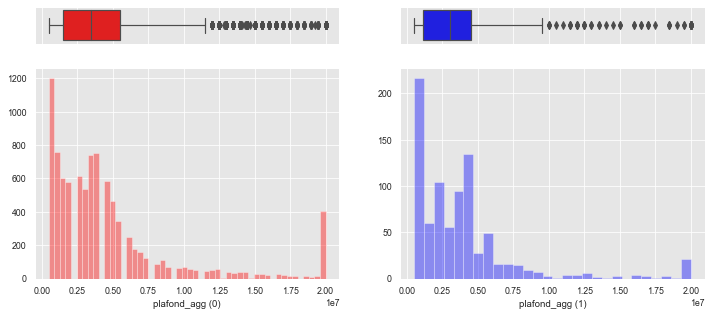

C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

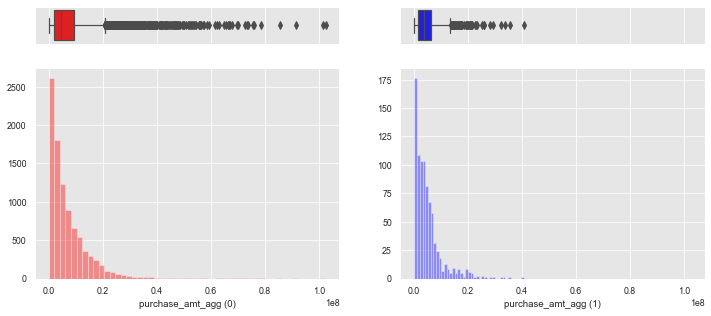

C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

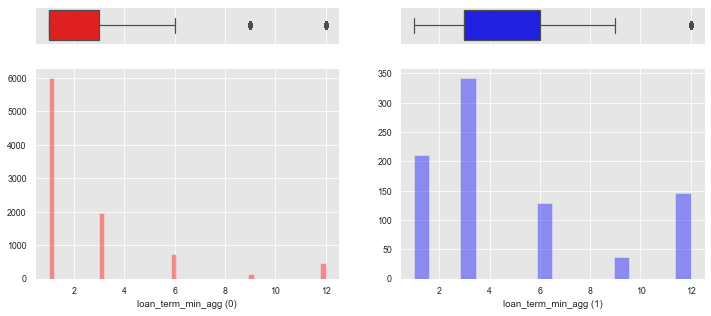

C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

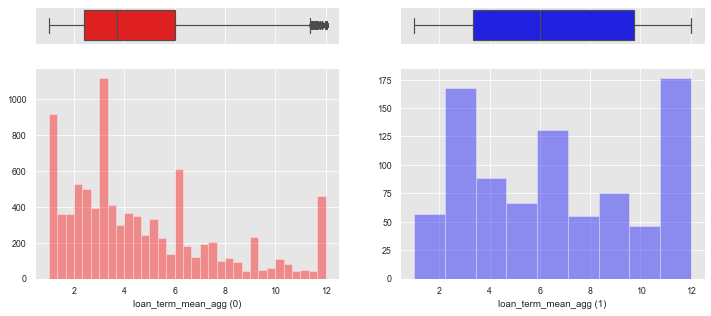

C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

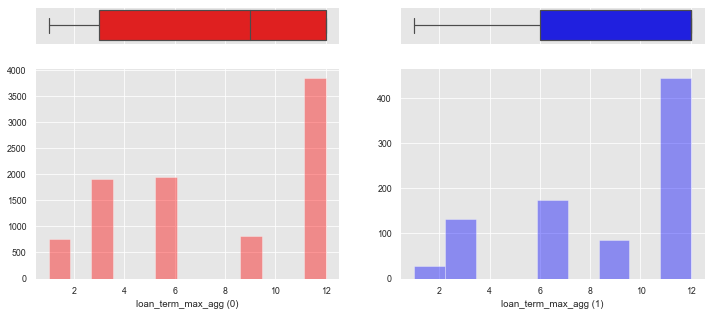

C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

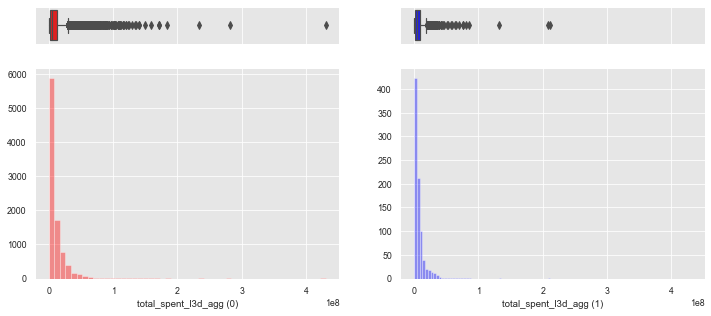

C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

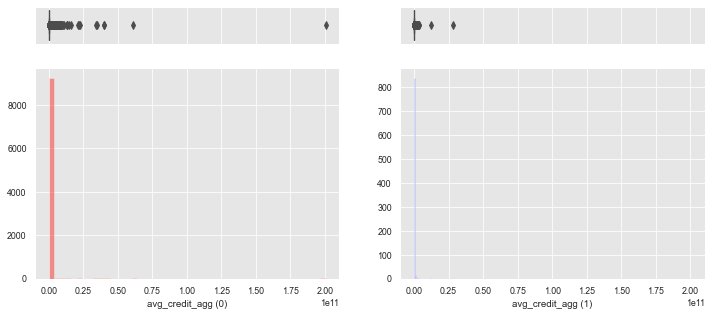

C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

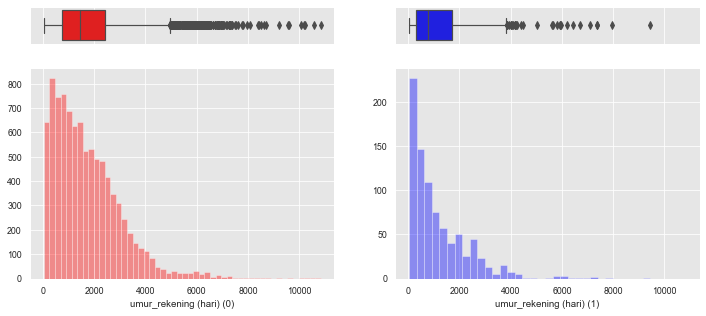

C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

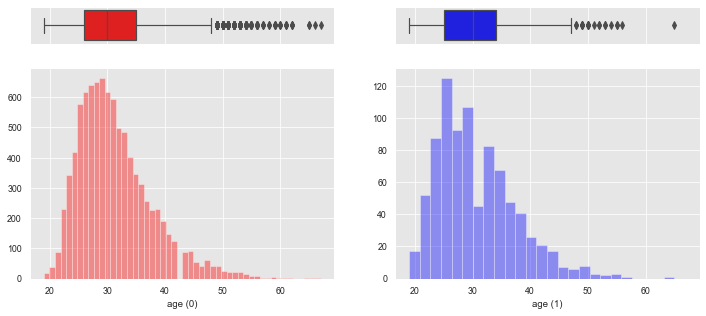

In [50]:
x = ["plafond_agg", "purchase_amt_agg", "loan_term_min_agg", "loan_term_mean_agg", "loan_term_max_agg", "total_spent_l3d_agg"
    ,"avg_credit_agg","umur_rekening (hari)","age"]
for col in x:
    divided_box_hist_plot(df[col], df.label)

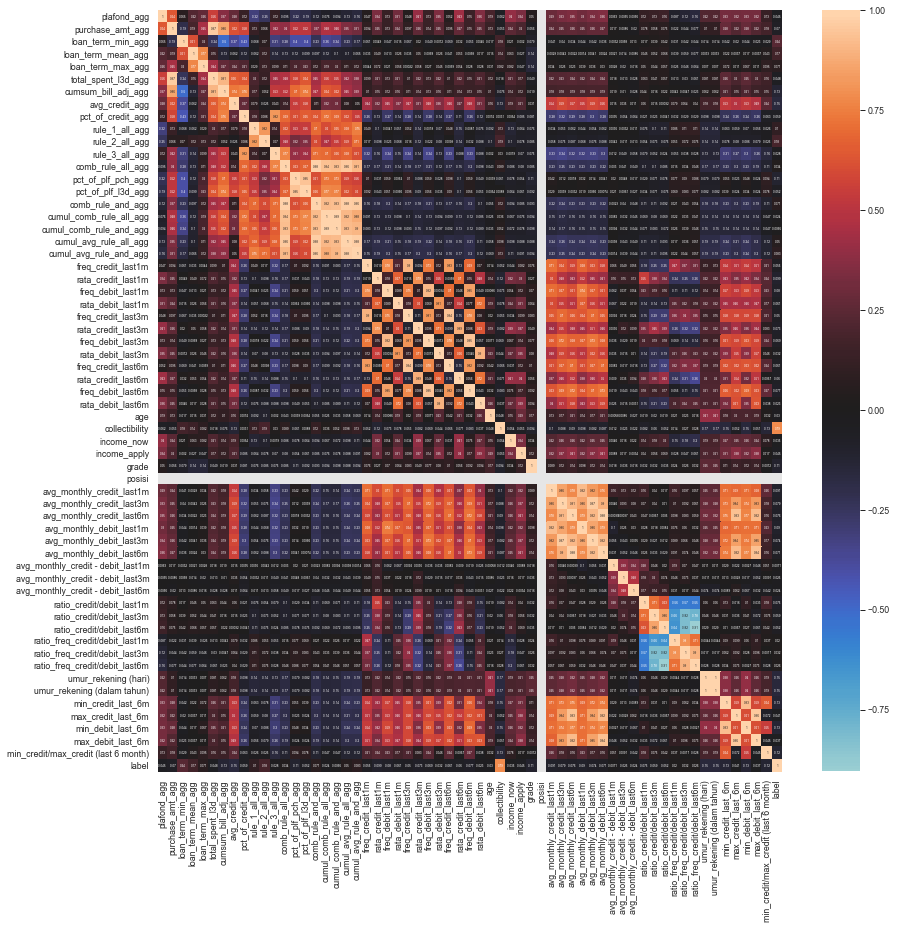

In [51]:
numeric_corr(df, method="spearman")